In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_excel(r'C:\Users\DELL\Desktop\chatbot_interactions.xlsx')
df.head(10)

,User ID,Timestamp,Session ID,User Message,Chatbot Response,Sentiment Score,Age,Gender,Location
0,225,2024-02-02 11:50:46.168,4941,Hello,Hi there!,positive,31,Male,Europe
1,368,2024-01-18 11:50:46.168,3696,How can I?,"Sure, let me help you.",positive,24,Female,South America
2,177,2024-06-22 11:50:46.168,3398,Tell me more,Here's what I found.,positive,23,Other,Europe
3,206,2024-03-11 11:50:46.168,1214,I have a question,What else can I assist with?,positive,24,Female,North America
4,288,2024-06-03 11:50:46.168,3275,Thanks,You're welcome!,positive,56,Male,Europe
5,81,2023-12-10 11:50:46.168,4112,Bye,Goodbye!,negative,33,Other,North America
6,457,2024-02-09 11:50:46.168,4614,Hello,Hi there!,positive,53,Male,Africa
7,309,2023-10-08 11:50:46.168,4124,How can I?,"Sure, let me help you.",positive,58,Female,Europe
8,472,2023-09-01 11:50:46.168,2623,Tell me more,Here's what I found.,neutral,60,Female,Asia
9,129,2023-12-08 11:50:46.168,3115,I have a question,What else can I assist with?,neutral,31,Male,Asia


In [21]:
#setting up the visualization style
sns.set(style="whitegrid")

In [22]:
#Basic Satstistics and Structure
print("Basic Stastistics")
print(df.describe(include='all'))
print("\n Data Structure")
print(df.info())

Basic Stastistics
            User ID                      Timestamp   Session ID User Message  \
count   3000.000000                           3000  3000.000000         3000   
unique          NaN                            NaN          NaN            6   
top             NaN                            NaN          NaN        Hello   
freq            NaN                            NaN          NaN          500   
mean     246.159333  2024-01-05 00:47:24.571635968  2987.772667          NaN   
min        1.000000     2023-07-07 11:50:46.169000  1000.000000          NaN   
25%      121.000000  2023-10-04 11:50:46.173250048  2005.500000          NaN   
50%      245.000000  2024-01-06 23:50:46.171500032  2963.500000          NaN   
75%      369.250000  2024-04-02 17:50:46.172750080  4021.250000          NaN   
max      500.000000     2024-07-06 11:50:46.174000  4999.000000          NaN   
std      144.604772                            NaN  1150.933243          NaN   

       Chatbot Respon

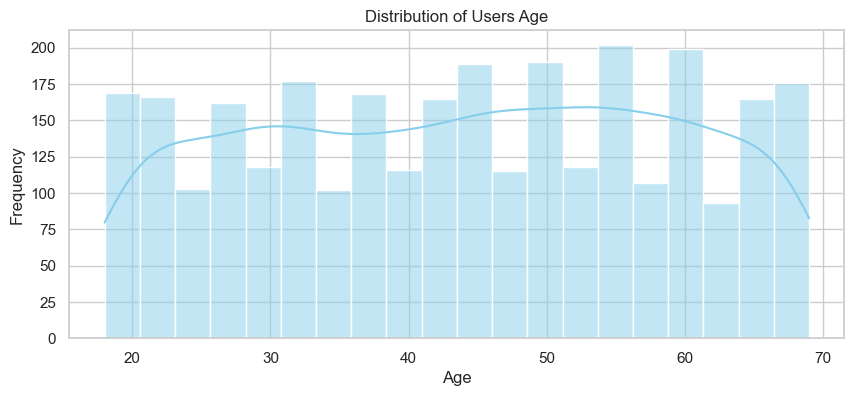

In [23]:
#Distribution of User Age
plt.figure(figsize=(10,4))
sns.histplot(df['Age'],bins=20,kde=True,color='skyblue')
plt.title('Distribution of Users Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [24]:
print("\n Sentiment Score Count :")
print(df['Sentiment Score'].value_counts())


 Sentiment Score Count :
Sentiment Score
positive    1204
negative     917
neutral      879
Name: count, dtype: int64


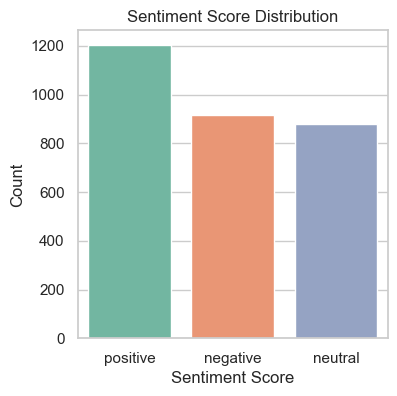

In [25]:
#Sentiment score Distribution
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='Sentiment Score',hue='Sentiment Score', palette='Set2')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

In [26]:
Gender_count= df['Gender'].value_counts()
print('\n Interaction by Gender')
print(Gender_count)


 Interaction by Gender
Gender
Female    1356
Male      1316
Other      328
Name: count, dtype: int64


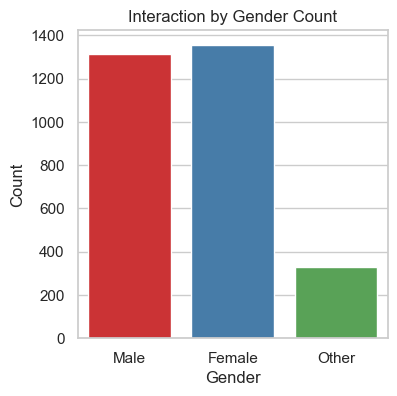

In [27]:
#User Interaction by Gender count
plt.figure(figsize=(4,4))
sns.countplot(data=df,x='Gender',hue='Gender',palette='Set1')
plt.title('Interaction by Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [28]:
avg_age_sentiment=df.groupby('Sentiment Score')['Age'].mean()
print('\n Average Age by Sentiment')
print(avg_age_sentiment)


 Average Age by Sentiment
Sentiment Score
negative    43.461287
neutral     43.993174
positive    44.067276
Name: Age, dtype: float64


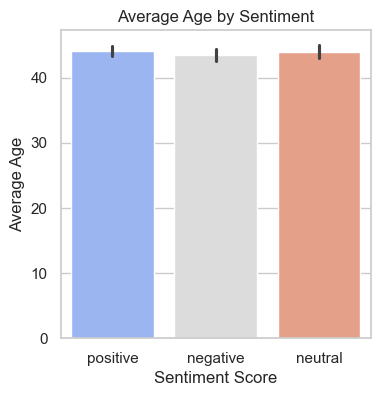

In [29]:
#Average Age by Sentiment
plt.figure(figsize=(4,4))
sns.barplot(data=df,x='Sentiment Score',y='Age',hue='Sentiment Score',estimator='mean',palette='coolwarm')
plt.title('Average Age by Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Average Age')
plt.show()

In [30]:
df['Date']=df['Timestamp'].dt.date
interaction_over_time=df.groupby('Date').size()
print('\nUser Interaction Over Time')
print(interaction_over_time.head(10))


User Interaction Over Time
Date
2023-07-07     6
2023-07-08     8
2023-07-09    10
2023-07-10    12
2023-07-11     5
2023-07-12    10
2023-07-13     4
2023-07-14    11
2023-07-15     4
2023-07-16     8
dtype: int64


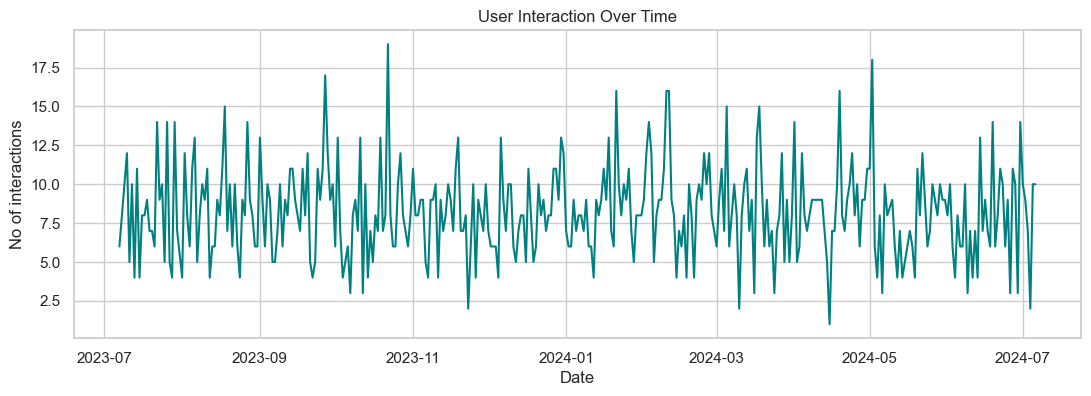

In [31]:
# User Interaction over Time
plt.figure(figsize=(13,4))
interaction_over_time.plot(kind='line',color='teal')
plt.title('User Interaction Over Time')
plt.xlabel('Date')
plt.ylabel('No of interactions')
plt.grid(True)
plt.show()

In [32]:
location_count=df['Location'].value_counts()
print('\nIntraction by Location')
print(location_count)


Intraction by Location
Location
North America    907
Asia             883
Europe           569
South America    338
Oceania          157
Africa           146
Name: count, dtype: int64


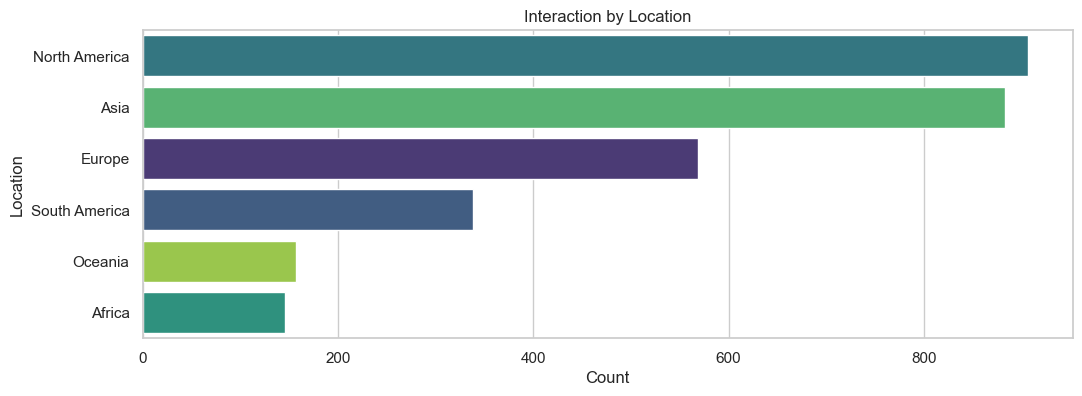

In [33]:
#User Interaction by Location
plt.figure(figsize=(12,4))
sns.countplot(data=df,y='Location',hue='Location',palette='viridis',order=df['Location'].value_counts().index)
plt.title('Interaction by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

In [34]:
avg_sentiment_gender=df.groupby('Gender')['Sentiment Score'].value_counts(normalize=True).unstack()
print("\nAverage Sentiment by Gender:")
print(avg_sentiment_gender)


Average Sentiment by Gender:
Sentiment Score  negative   neutral  positive
Gender                                       
Female           0.312684  0.294248  0.393068
Male             0.308511  0.286474  0.405015
Other            0.265244  0.314024  0.420732


<Figure size 400x400 with 0 Axes>

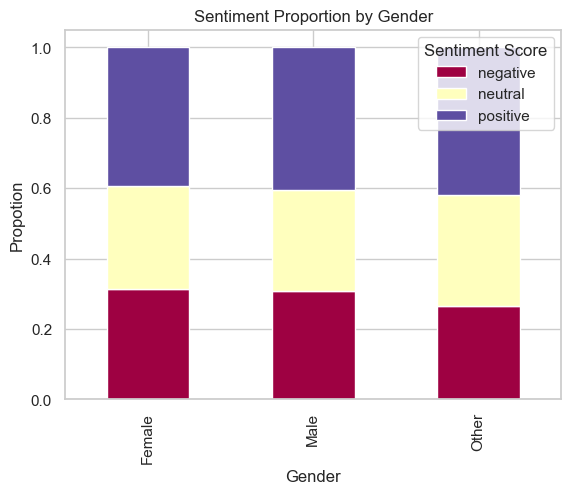

In [35]:
#Sentiment Propotion by Gender
plt.figure(figsize=(4,4))
avg_sentiment_gender.plot(kind='bar',stacked=True,cmap='Spectral')
plt.title('Sentiment Proportion by Gender')
plt.xlabel('Gender')
plt.ylabel('Propotion')
plt.legend(title='Sentiment Score')
plt.show()

In [39]:
message_counts=df['User Message'].value_counts()
print('\n Most Frequente User Message')
print(message_counts)


 Most Frequente User Message
User Message
Hello                500
How can I?           500
Tell me more         500
I have a question    500
Thanks               500
Bye                  500
Name: count, dtype: int64


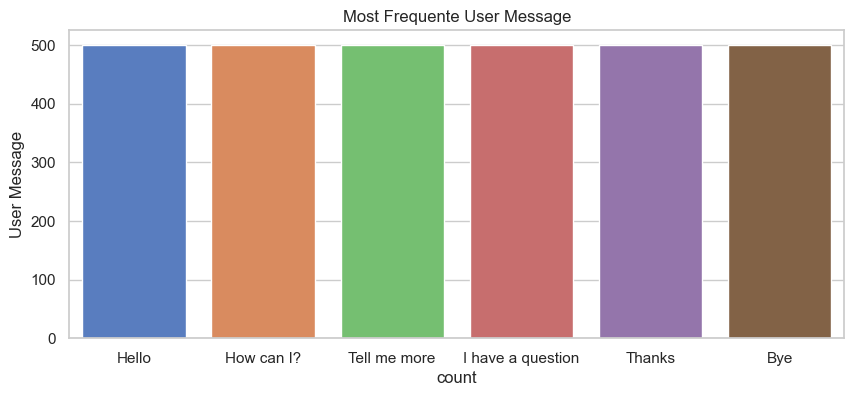

In [42]:
# Most Frequente User Message
plt.figure(figsize=(10,4))
sns.barplot(x=message_counts.index,y=message_counts.values, hue=message_counts.index, legend=False,palette='muted')
plt.title('Most Frequente User Message')
plt.xlabel('count')
plt.ylabel('User Message')
plt.show()

In [52]:
age_bins = [18, 25, 35, 45, 55, 65, 75]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)
sentiment_by_age_group = df.groupby('Age Group')['Sentiment Score'].value_counts(normalize=True).unstack()
print("\nSentiment Across Age Groups:")
print(sentiment_by_age_group)


Sentiment Across Age Groups:
Sentiment Score  negative   neutral  positive
Age Group                                    
(18, 25]         0.305128  0.300000  0.394872
(25, 35]         0.336315  0.271914  0.391771
(35, 45]         0.289242  0.312169  0.398589
(45, 55]         0.301413  0.290424  0.408163
(55, 65]         0.281416  0.290265  0.428319
(65, 75]         0.337607  0.299145  0.363248


C:\Users\DELL\AppData\Local\Temp\ipykernel_8600\16299985.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_age_group = df.groupby('Age Group')['Sentiment Score'].value_counts(normalize=True).unstack()


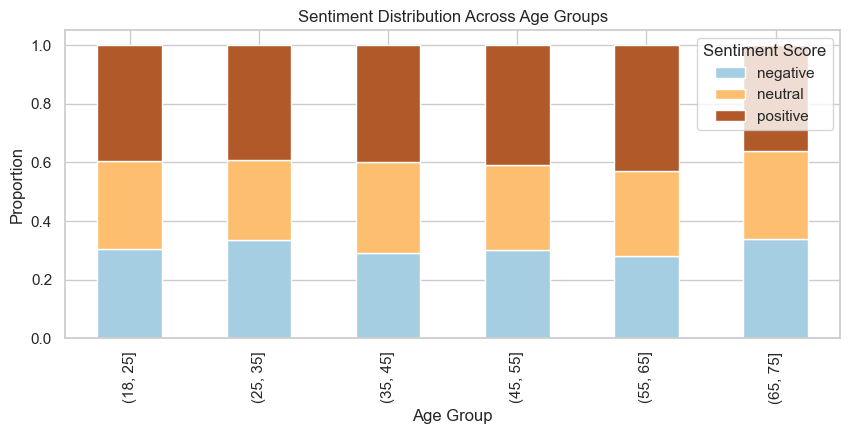

In [45]:
# Visualization: Sentiment Across Age Groups
sentiment_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 4), colormap='Paired')
plt.title('Sentiment Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Sentiment Score')
plt.show()

In [47]:
response_counts = df['Chatbot Response'].value_counts().head(10)
print("\nMost Frequent Chatbot Responses:")
print(response_counts)


Most Frequent Chatbot Responses:
Chatbot Response
Hi there!                       500
Sure, let me help you.          500
Here's what I found.            500
What else can I assist with?    500
You're welcome!                 500
Goodbye!                        500
Name: count, dtype: int64


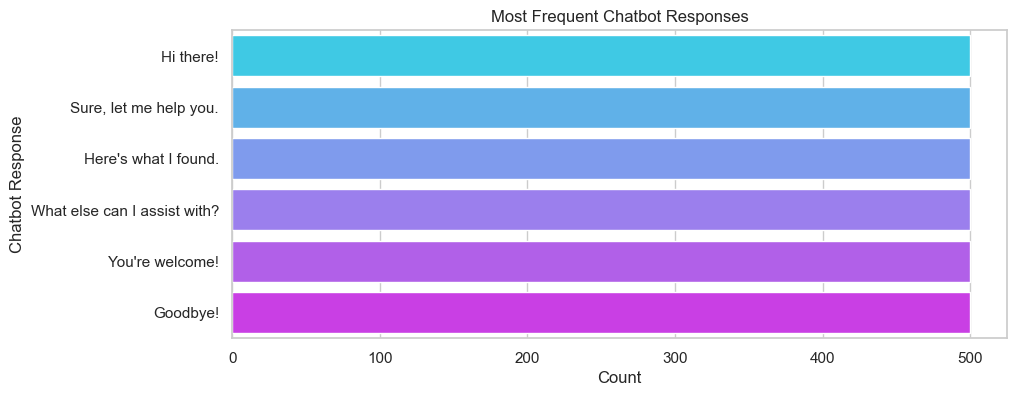

In [53]:
#Visualization: Most Frequent Chatbot Responses
plt.figure(figsize=(10, 4))
sns.barplot(y=response_counts.index, x=response_counts.values,hue=response_counts.index, palette='cool', legend=False)
plt.title('Most Frequent Chatbot Responses')
plt.xlabel('Count')
plt.ylabel('Chatbot Response')
plt.show()